# Análise Exploratória de Dados

## 1) Entendimento dos dados:

In [69]:
# Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import os

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_clean.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Dicionário dos dados:

| Coluna        | Tipo Estatístico | Tipo Computacional | Significado                                                                 |
|---------------|------------------|--------------------|----------------------------------------------------------------------------|
| Brand         | Qualitativo      | object (string)    | Marca do veículo                                                           |
| Model         | Qualitativo      | object (string)    | Modelo do veículo                                                          |
| Year          | Quantitativo     | int64              | Ano de fabricação do veículo                                               |
| Engine_Size   | Quantitativo     | float64            | Tamanho do motor do veículo (em litros)                                    |
| Fuel_Type     | Qualitativo      | object (string)    | Tipo de combustível utilizado pelo veículo                                 |
| Transmission  | Qualitativo      | object (string)    | Tipo de transmissão do veículo (Manual, Automática, Semi-Automática, etc.) |
| Mileage       | Quantitativo     | int64              | Quilometragem rodada pelo veículo                                          |
| Doors         | Quantitativo     | int64              | Número de portas do veículo                                                |
| Owner_Count   | Quantitativo     | int64              | Número de proprietários anteriores                                         |
| Price         | Quantitativo     | int64              | Preço do veículo (em unidade monetária)                                    |

## 2) Análise Univariada

In [2]:
# Criando funções para análise univariada
def estatistica_qualitativa(df, column):
    coluna = df[column].copy()
    contagem = coluna.value_counts()
    proporcao = coluna.value_counts(normalize=True) * 100
    df_resumo = pd.DataFrame({'Contagem': contagem, 'Proporção (%)': proporcao})
    df_resumo.index.name = column
    df_resumo.reset_index(inplace=True)
    df_resumo['Proporção (%)'] = df_resumo['Proporção (%)'].round(2)
    return df_resumo

def plot_histogram(df, column, qtd_bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=qtd_bins)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid()
    plt.show()


def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts(normalize=True).index)
    plt.title(f'Contagem de {column}')
    plt.xlabel('Frequência')
    plt.ylabel(column)
    plt.grid()
    plt.show()

def plot_pie(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Gráfico de Pizza de {column}')
    plt.ylabel('')
    plt.grid()
    plt.show()

### `Brand`:

In [3]:
estatistica_qualitativa(df, 'Brand')

,Brand,Contagem,Proporção (%)
0,Ford,1048,10.48
1,Audi,1038,10.38
2,Volkswagen,1020,10.20
3,Honda,1009,10.09
4,Chevrolet,1003,10.03
5,BMW,999,9.99
6,Hyundai,995,9.95
7,Kia,976,9.76
8,Toyota,970,9.70
9,Mercedes,942,9.42


In [4]:
diferenca_max_min = df['Brand'].value_counts().max() - df['Brand'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Brand"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 106
Quantidade de registros da marca mais frequente: 1048
Proporção da diferença em relação à marca menos frequente: 11.25%


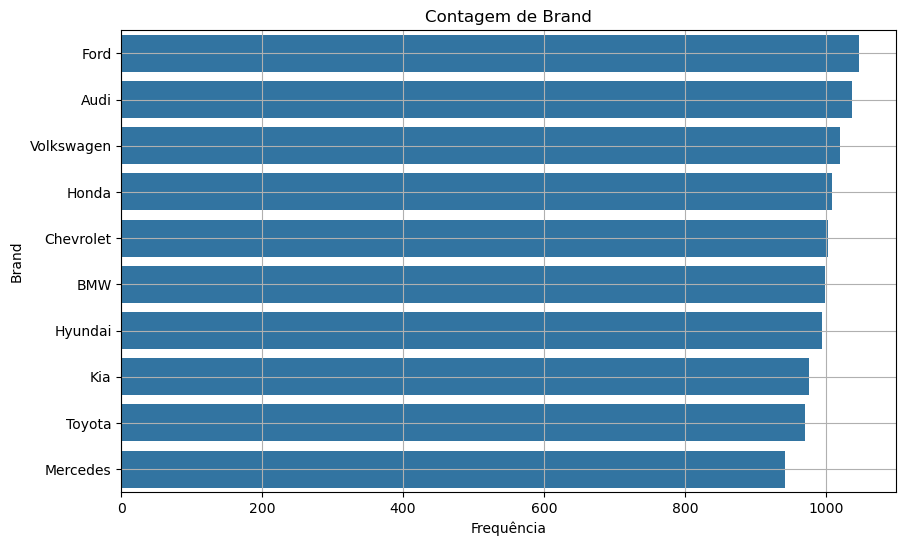

In [5]:
plot_bar(df, 'Brand')

> Há uma quantidade balanceada de registros de cada Marca de carro, havendo no total 10 valores de marcas de carros, como exibidos na tabela acima

> A Ford é a marca com maior quantidade de veículos, porém tem apenas 11.25% dados a mais em relação a marca com menor quantidade de veículos (Mercedes)

### `Model`:

In [6]:
estatistica_qualitativa(df, 'Model')

,Model,Contagem,Proporção (%)
0,Accord,365,3.65
1,Fiesta,363,3.63
2,Impala,355,3.55
3,5 Series,353,3.53
4,Tiguan,352,3.52
5,Focus,351,3.51
6,Q5,350,3.50
7,A4,350,3.50
8,Elantra,347,3.47
9,Golf,339,3.39


In [7]:
diferenca_max_min = df['Model'].value_counts().max() - df['Model'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Model"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 59
Quantidade de registros da marca mais frequente: 365
Proporção da diferença em relação à marca menos frequente: 6.26%


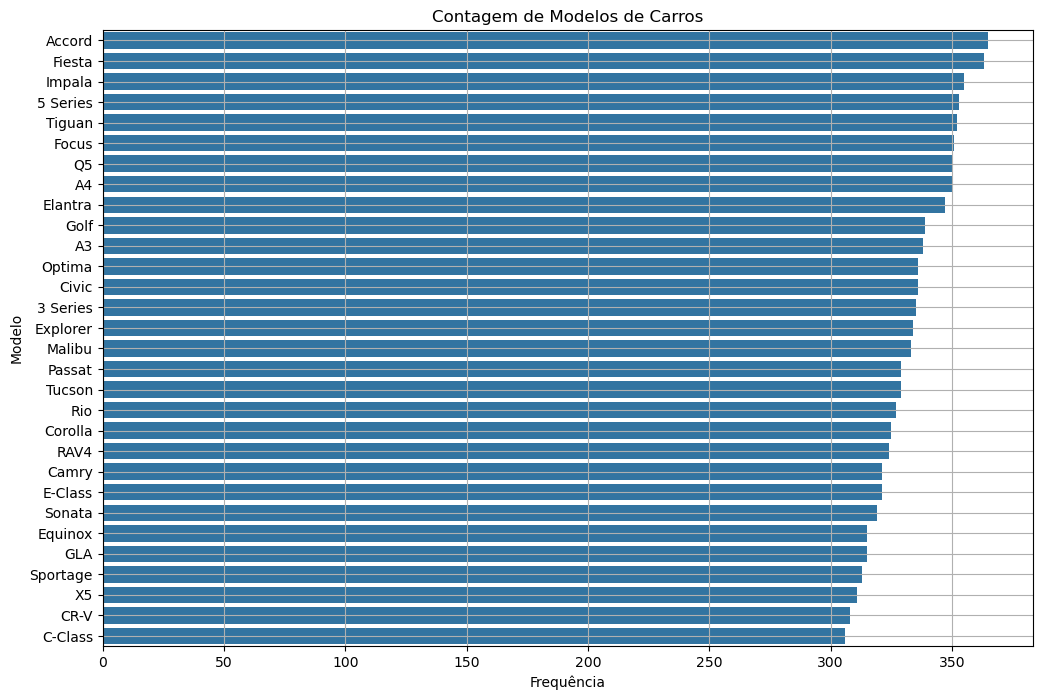

In [8]:
# Plotar grafico de barras horizontais que possa suportar 29 modelos de carros
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Model'], order=df['Model'].value_counts().index)
plt.title('Contagem de Modelos de Carros')
plt.xlabel('Frequência')
plt.ylabel('Modelo')
plt.grid()  
plt.show()


> Mesmo havendo um total de 30 modelos, não há uma diferença significativa entre a quantidade de dados de carro por marca, garantindo um balanceamento para tal fator

> O Accord é o modelo com maior quantidade de veículos, porém tem apenas 6.26% dados a mais em relação ao modelo com menor quantidade de veículos (C-Class)

### `Year`:

In [9]:
df['Year'].describe()

count    10000.000000
mean      2011.543700
std          6.897699
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64

In [10]:
estatistica_qualitativa(df, 'Year')

,Year,Contagem,Proporção (%)
0,2002,462,4.62
1,2011,449,4.49
2,2023,448,4.48
3,2012,437,4.37
4,2017,433,4.33
5,2005,431,4.31
6,2010,431,4.31
7,2007,430,4.30
8,2015,426,4.26
9,2018,425,4.25


In [11]:
diferenca_max_min = df['Year'].value_counts().max() - df['Year'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Year'].value_counts().min()) * 100

print(f'Diferença entre o ano com mais veículos e ano com menos: {diferenca_max_min}')
print(f'Quantidade de registros do ano que mais aparece: {df["Year"].value_counts().max()}')

print(f'Proporção da diferença em relação aos anos de veículos: {proporcao_max_min:.2f}%')

Diferença entre o ano com mais veículos e ano com menos: 81
Quantidade de registros do ano que mais aparece: 462
Proporção da diferença em relação aos anos de veículos: 21.26%


Text(0.5, 1.0, 'Contagem de Anos de Carros')

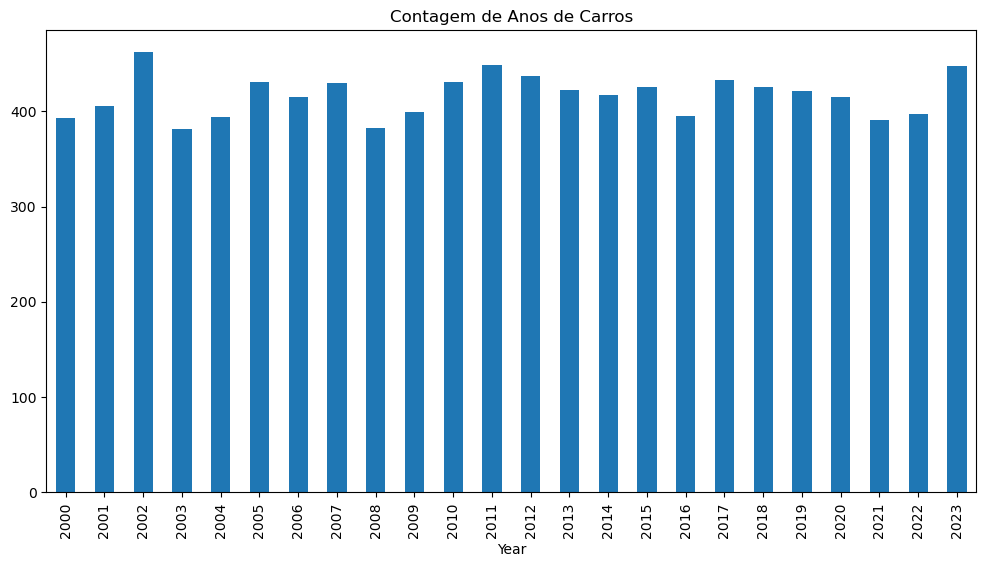

In [12]:
# Gráfico de barras para anos ordenado por ano
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Contagem de Anos de Carros')

In [13]:
# Análise por decada
df_2000s = df[df['Year'].between(2000, 2009)]
df_2010s = df[df['Year'].between(2010, 2019)]
df_2020s = df[df['Year'] >= 2020]

print(f'Quantidade de veículos dos anos 2000: {len(df_2000s)}')
print(f'Quantidade de veículos dos anos 2010: {len(df_2010s)}')
print(f'Quantidade de veículos dos anos 2020: {len(df_2020s)}')

Quantidade de veículos dos anos 2000: 4093
Quantidade de veículos dos anos 2010: 4256
Quantidade de veículos dos anos 2020: 1651


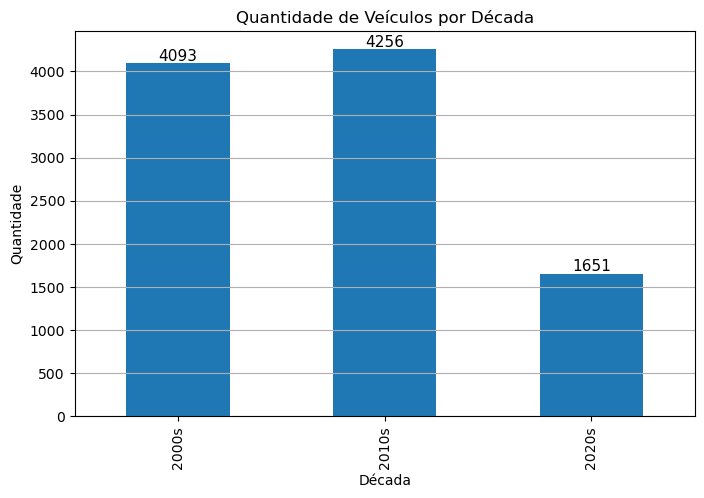

In [14]:
# Gráfico de barras para décadas
# Criando uma Series com as quantidades por década
decadas = pd.Series({
    '2000s': len(df_2000s),
    '2010s': len(df_2010s),
    '2020s': len(df_2020s)
})

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
ax = decadas.plot(kind='bar')
plt.title('Quantidade de Veículos por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.grid(axis='y')

# Adicionando os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


> Há um leve desbalanceamento em relação a quantidade de veículos por ano, e ainda maior considerando por década, onde há uma quantidade relativamente menor de veículos da década de 2020 e prepoderância da década de 2010.

### `Engine_Size`:

In [15]:
df['Engine_Size'].describe()

count    10000.000000
mean         3.000560
std          1.149324
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Engine_Size, dtype: float64

In [16]:
df['Engine_Size'].value_counts()

Engine_Size
3.7    273
4.4    271
3.6    267
2.5    266
1.5    265
4.0    263
2.8    262
4.6    262
1.3    261
2.2    259
1.4    259
2.6    259
1.6    258
2.0    258
4.1    257
3.5    256
3.1    254
3.3    254
4.7    253
3.8    253
2.9    253
1.2    251
4.5    250
2.7    250
3.2    249
1.8    249
4.9    247
1.7    246
3.4    243
4.3    242
2.4    240
3.0    236
3.9    236
2.1    234
4.2    232
1.9    232
4.8    231
1.1    230
2.3    223
1.0    113
5.0    103
Name: count, dtype: int64

In [17]:
# Calcular bins com a regra de Sturges
x = df['Engine_Size'].dropna()
n = len(df['Engine_Size'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 22 bins


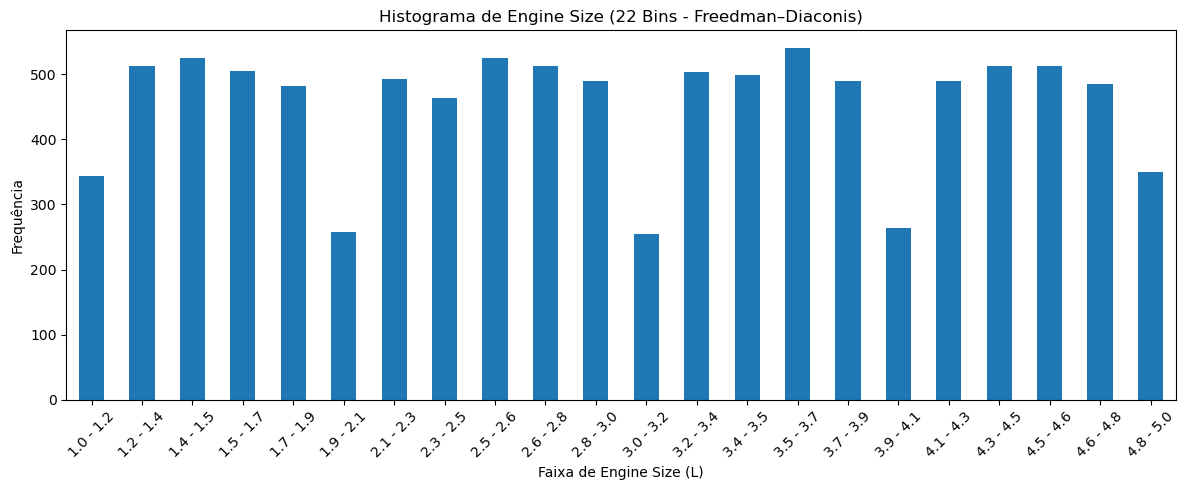

In [18]:
x = df['Engine_Size'].dropna()

# Gerar os 22 intervalos manualmente
bin_edges = np.linspace(x.min(), x.max(), num=23)  # 23 pontos = 22 intervalos
labels = [f"{round(bin_edges[i],1)} - {round(bin_edges[i+1],1)}" for i in range(len(bin_edges)-1)]

# Criar uma nova coluna com os rótulos dos bins
df['Engine_Bin'] = pd.cut(x, bins=bin_edges, labels=labels, include_lowest=True)

# Ver quantos dados caíram em cada intervalo
frequencias = df['Engine_Bin'].value_counts().sort_index()

# Plotar histograma com rótulos personalizados
frequencias.plot(kind='bar', figsize=(12, 5))
plt.xticks(rotation=45)
plt.xlabel('Faixa de Engine Size (L)')
plt.ylabel('Frequência')
plt.title('Histograma de Engine Size (22 Bins - Freedman–Diaconis)')
plt.tight_layout()
plt.show()

In [19]:
# Agrupando motores
def categorize_engine_size(size):
    if size < 1.0:
        return 'Menos de 1.0L'
    elif 1.0 <= size < 1.5:
        return '1.0L a 1.5L'
    elif 1.5 <= size < 2.0:
        return '1.5L a 2.0L'
    elif 2.0 <= size < 2.5:
        return '2.0L a 2.5L'
    elif 2.5 <= size < 3.0:
        return '2.5L a 3.0L'
    elif 3.0 <= size < 3.5:
        return '3.0L a 3.5L'
    elif 3.5 <= size < 4.0:
        return '3.5L a 4.0L'
    elif 4.0 <= size < 4.5:
        return '4.0L a 4.5L'
    elif 4.5 <= size < 5.0:
        return '4.5L a 5.0L'
    
df_agrupamento = df.copy()
df_agrupamento['Engine_Size_Category'] = df_agrupamento['Engine_Size'].apply(categorize_engine_size)
estatistica_qualitativa(df_agrupamento, 'Engine_Size_Category')

,Engine_Size_Category,Contagem,Proporção (%)
0,2.5L a 3.0L,1290,13.03
1,3.5L a 4.0L,1285,12.98
2,4.0L a 4.5L,1265,12.78
3,1.5L a 2.0L,1250,12.63
4,4.5L a 5.0L,1243,12.56
5,3.0L a 3.5L,1236,12.49
6,2.0L a 2.5L,1214,12.27
7,1.0L a 1.5L,1114,11.26


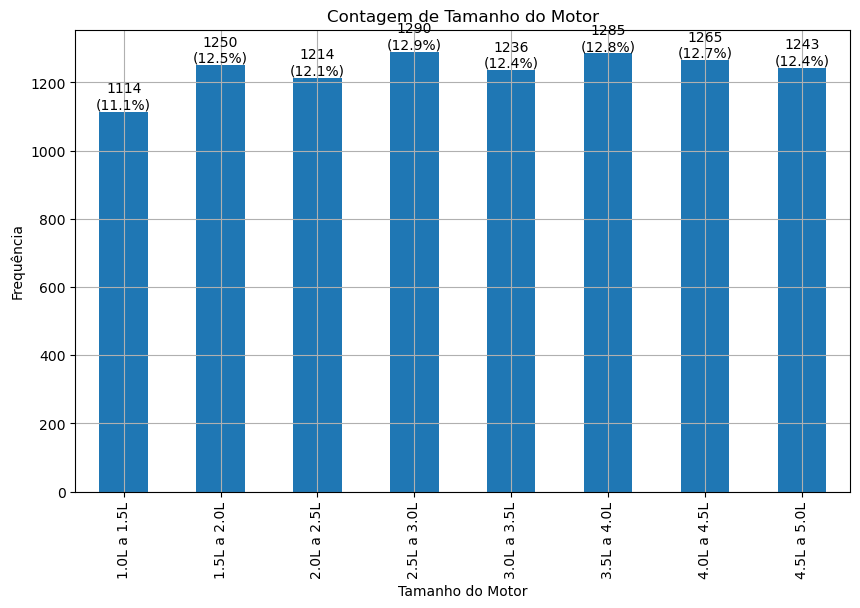

In [20]:
# Plotar gráfico de barras para categorias de tamanho do motor com números e porcentagem
ax = df_agrupamento['Engine_Size_Category'].value_counts().sort_index().plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Contagem de Tamanho do Motor')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Frequência')
plt.grid()

# Adiciona os valores absolutos e percentuais acima das barras
total = len(df_agrupamento)
for p in ax.patches:
    valor = int(p.get_height())
    percentual = valor / total * 100
    ax.annotate(f'{valor}\n({percentual:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


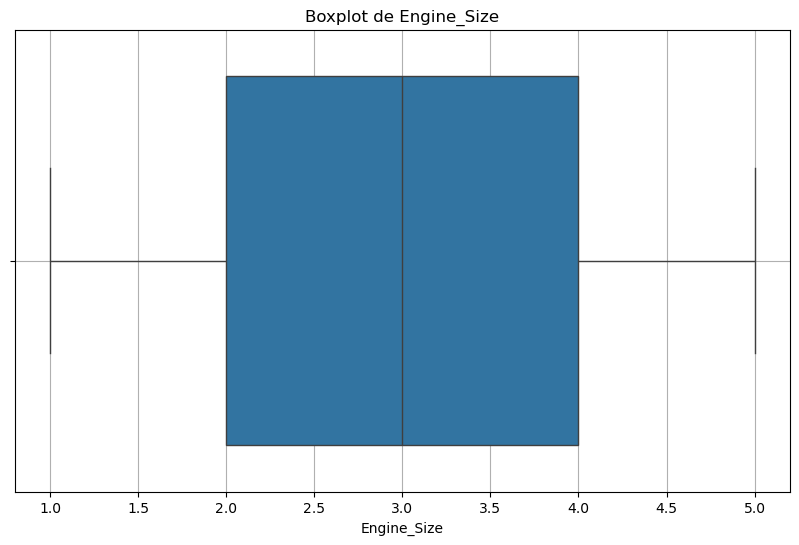

In [21]:
# Boxplot
plot_boxplot(df, 'Engine_Size')

In [22]:
IQR_Engine_Size = df['Engine_Size'].quantile(0.75) - df['Engine_Size'].quantile(0.25)
quartis = df['Engine_Size'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(f'IQR do tamanho do motor: {IQR_Engine_Size}')
print(f'Quartis do tamanho do motor:\n{quartis}')
print(f'Curtoses do tamanho do motor:\n{stats.kurtosis(df["Engine_Size"])}')
print(f'Assimetria do tamanho do motor:\n{stats.skew(df["Engine_Size"])}')

IQR do tamanho do motor: 2.0
Quartis do tamanho do motor:
0.1    1.4
0.2    1.8
0.3    2.2
0.4    2.6
0.5    3.0
0.6    3.4
0.7    3.8
0.8    4.2
0.9    4.6
Name: Engine_Size, dtype: float64
Curtoses do tamanho do motor:
-1.1966318041432136
Assimetria do tamanho do motor:
-0.008233754006580602


> Há uma disparidade grande em relação a quantidade de veículos com volume interno do maior que 2.0L e os de quantia menor.

> No demais, há uma quantidade balanceada em relação a quantidade de veículos por faixa de volume interno do motor

### `Fuel Type`

In [23]:
estatistica_qualitativa(df, 'Fuel_Type')

,Fuel_Type,Contagem,Proporção (%)
0,Electric,2625,26.25
1,Diesel,2512,25.12
2,Hybrid,2453,24.53
3,Petrol,2410,24.10


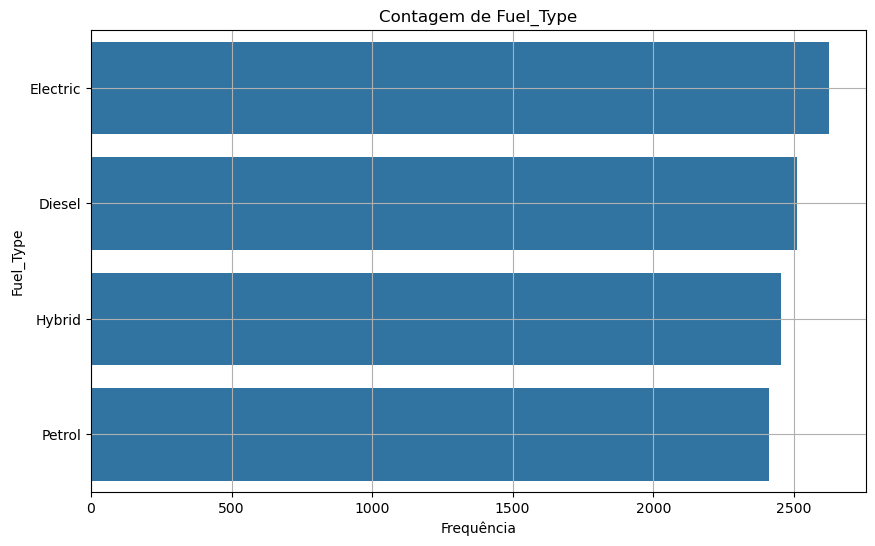

In [24]:
plot_bar(df, 'Fuel_Type')

In [25]:
diferenca_max_min = df['Fuel_Type'].value_counts().max() - df['Fuel_Type'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Fuel_Type'].value_counts().min()) * 100

print(f'Diferença de dados entre o tipo de combustível com maior quantidade de veículos e o menor : {diferenca_max_min}')
print(f'Quantidade de registros do mais frequente: {df["Fuel_Type"].value_counts().max()}')

print(f'Proporção da diferença em relação ao marca menos frequente: {proporcao_max_min:.2f}%')

Diferença de dados entre o tipo de combustível com maior quantidade de veículos e o menor : 215
Quantidade de registros do mais frequente: 2625
Proporção da diferença em relação ao marca menos frequente: 8.92%


> Há quatro tipos de veículos no dataset: movidos a gasolina apenas, híbridos (gasolina e álcool), diesel e elétricos

> Apesar de haver uma maior quantidade de veículos elétricos, a quantidade dos veículos por tipo de combustível não chega a ser tanta, considerando o tamanho do dataset (apenas 8,92%)

### `Transmission`

In [26]:
estatistica_qualitativa(df, 'Transmission')

,Transmission,Contagem,Proporção (%)
0,Manual,3372,33.72
1,Automatic,3317,33.17
2,Semi-Automatic,3311,33.11


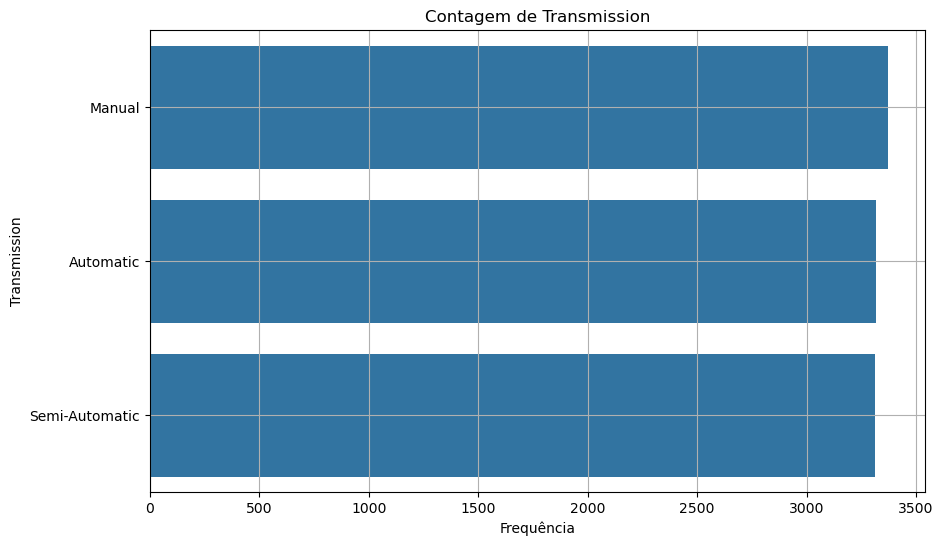

In [27]:
plot_bar(df, 'Transmission')

> A quantidade de diferentes dados de acordo com o sistema de transmissão do veículo (manual, semiautomatico ou automático) é deveras balanceada entre as classes, em que todas as classes tem por volta de 33% de representatividade

### `Mileage`

In [28]:
df['Mileage'].describe()

count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage, dtype: float64

In [29]:
# Calcular bins com a regra de Sturges
x = df['Mileage'].dropna()
n = len(df['Mileage'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 22 bins


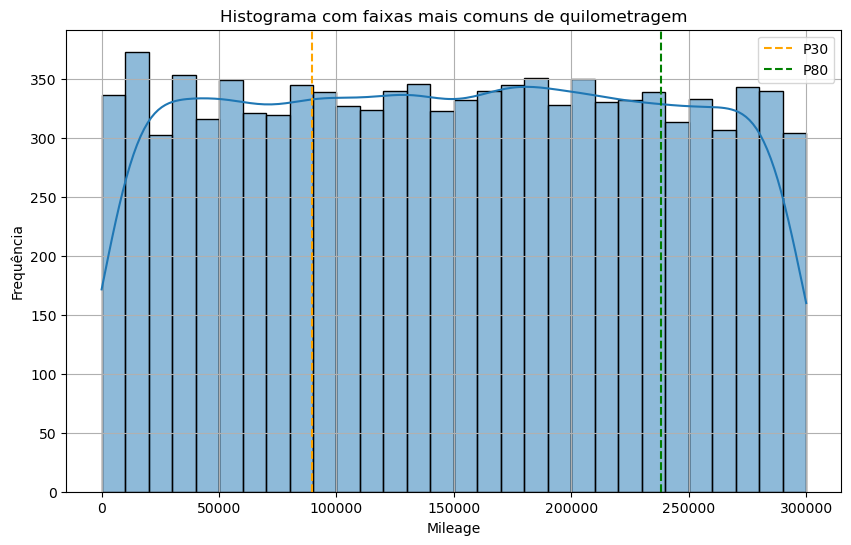

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.axvline(df['Mileage'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de quilometragem')
plt.xlabel('Mileage')
plt.ylabel('Frequência')
plt.grid()
plt.show()


In [31]:
IQR_Mileage = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
quartis = df['Mileage'].quantile([0.25, 0.5, 0.75])
percentis = df['Mileage'].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])
curtose = stats.kurtosis(df['Mileage'])
assimetria = stats.skew(df['Mileage'])
print(f'IQR da quilometragem: {IQR_Mileage}')
print(f'Quartis da quilometragem:\n{quartis}')
print(f'Percentis da quilometragem:\n{percentis}')
print(f'Curtose da quilometragem: {curtose}')
print(f'Assimetria da quilometragem: {assimetria}')

IQR da quilometragem: 148928.25
Quartis da quilometragem:
0.25     74649.25
0.50    149587.00
0.75    223577.50
Name: Mileage, dtype: float64
Percentis da quilometragem:
0.1     29586.5
0.2     59307.0
0.3     89633.6
0.4    119878.2
0.6    179242.4
0.7    208518.0
0.8    238265.6
0.9    269373.4
Name: Mileage, dtype: float64
Curtose da quilometragem: -1.1909668975513825
Assimetria da quilometragem: 0.0009186334048228518


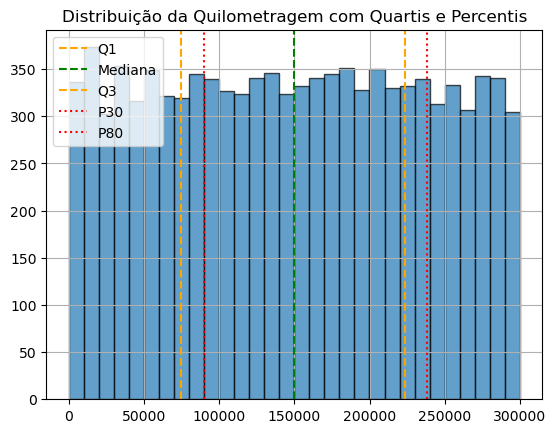

In [32]:
plt.hist(df['Mileage'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(df['Mileage'].quantile(0.25), color='orange', linestyle='--', label='Q1')
plt.axvline(df['Mileage'].quantile(0.5), color='green', linestyle='--', label='Mediana')
plt.axvline(df['Mileage'].quantile(0.75), color='orange', linestyle='--', label='Q3')
plt.axvline(df['Mileage'].quantile(0.3), color='red', linestyle=':', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='red', linestyle=':', label='P80')
plt.legend()
plt.title('Distribuição da Quilometragem com Quartis e Percentis')
plt.grid()
plt.show()


> Os dados da quilometragem (em milhas) estão bem dispersos ao entorno do conjunto dos valores

> A maior parte se encontra dentro da faixa (p3 - p8) de aproximadamente: 90.000 - 240.000 rodados (milhas/ km)

> Embora a distribuição seja simétrica, a própria curtose mostra que ela não é normal, pelo formato "achatado" (platocurtico) da curva

### `Doors`:

In [33]:
estatistica_qualitativa(df, 'Doors')

,Doors,Contagem,Proporção (%)
0,3,2575,25.75
1,4,2514,25.14
2,5,2456,24.56
3,2,2455,24.55


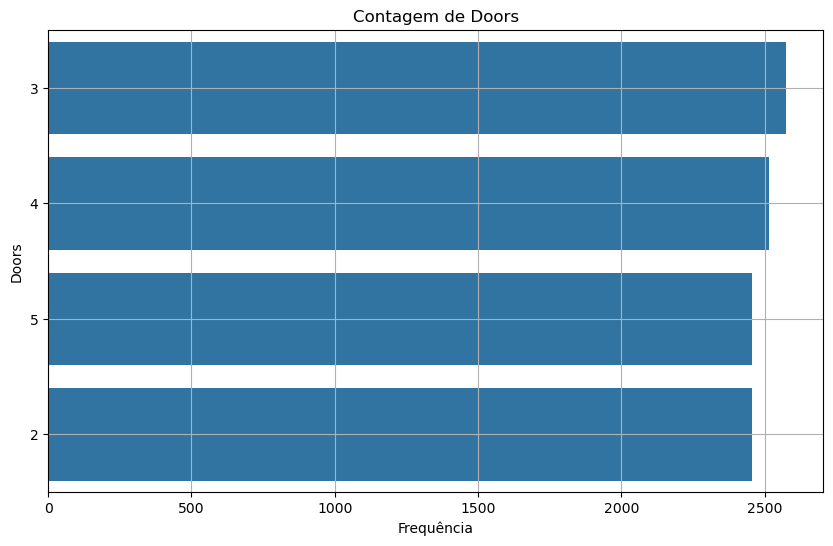

In [34]:
plot_bar(df, 'Doors')

> A quantidade de portas varia entre 2, 3, 4 ou 5 portas (possivelmente variando de acordo com modelo hatch, hatchback ou sedan)

> As classes estão relativamente balanceadas em relação a quantidade de registroos de veículos com cada quantidade de portas.

### `Owner_Count`

In [35]:
df['Owner_Count'].describe()

count    10000.000000
mean         2.991100
std          1.422682
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Owner_Count, dtype: float64

In [36]:
df['Owner_Count'].value_counts()

Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64

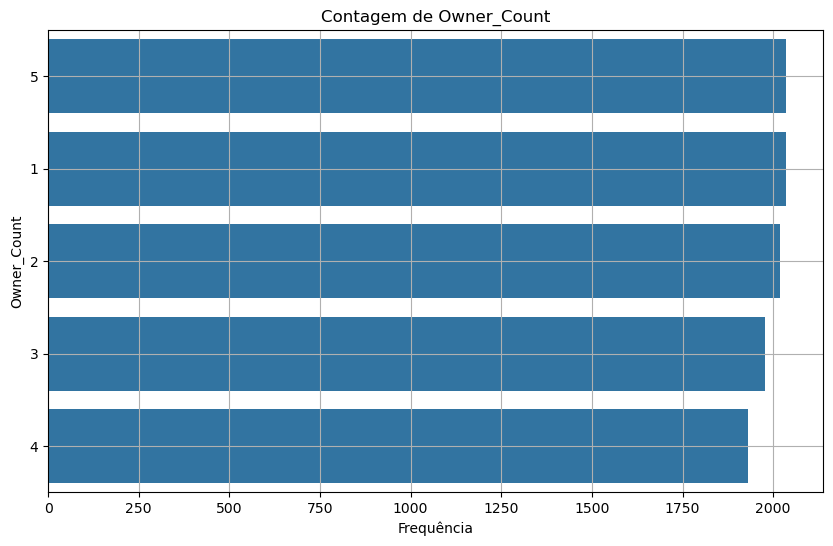

In [37]:
plot_bar(df, 'Owner_Count')

> A quantidade de donos que um veículo já teve tem quantidade de registros bimodal, ou seja, a maior parte dos veículos já teve ou 5 donos ou apenas 1

> No demais, apesar deste fator, a quantidade de registros é balanceada de acordo com as classes de quantidade de donos.

### `Price`

In [38]:
df['Price'].describe()

count    10000.00000
mean      8852.96440
std       3112.59681
min       2000.00000
25%       6646.00000
50%       8858.50000
75%      11086.50000
max      18301.00000
Name: Price, dtype: float64

In [39]:
# Calcular bins com a regra de Sturges
x = df['Price'].dropna()
n = len(df['Price'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 40 bins


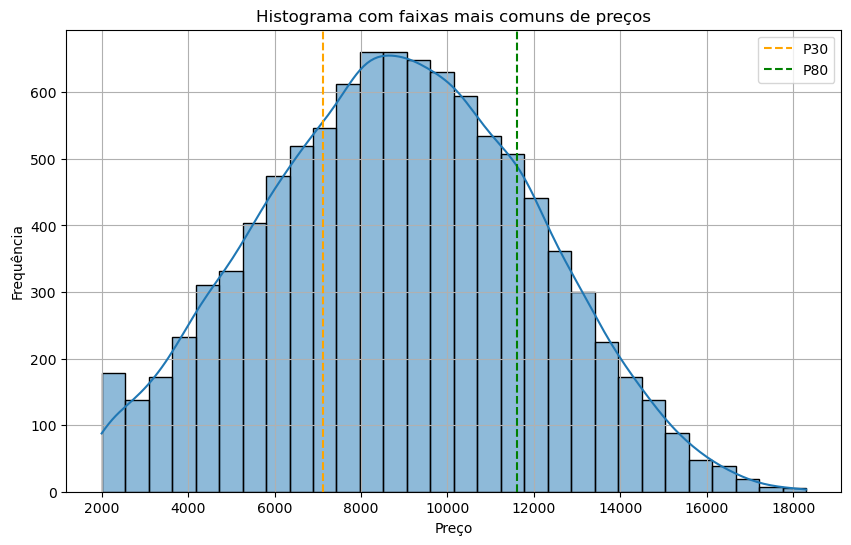

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.axvline(df['Price'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Price'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid()
plt.show()


In [41]:
print(f'IQR do preço: {df["Price"].quantile(0.75) - df["Price"].quantile(0.25)}')
print(f'Quartis do preço:\n{df["Price"].quantile([0.25, 0.5, 0.75])}')
print(f'Percentis do preço:\n{df["Price"].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])}')
print(f'Curtose do preço: {stats.kurtosis(df["Price"])}')
print(f'Assimetria do preço: {stats.skew(df["Price"])}')

IQR do preço: 4440.5
Quartis do preço:
0.25     6646.0
0.50     8858.5
0.75    11086.5
Name: Price, dtype: float64
Percentis do preço:
0.1     4672.4
0.2     6067.4
0.3     7127.7
0.4     8038.0
0.6     9701.4
0.7    10577.0
0.8    11602.6
0.9    12945.3
Name: Price, dtype: float64
Curtose do preço: -0.482304303022163
Assimetria do preço: 0.026132295080798108


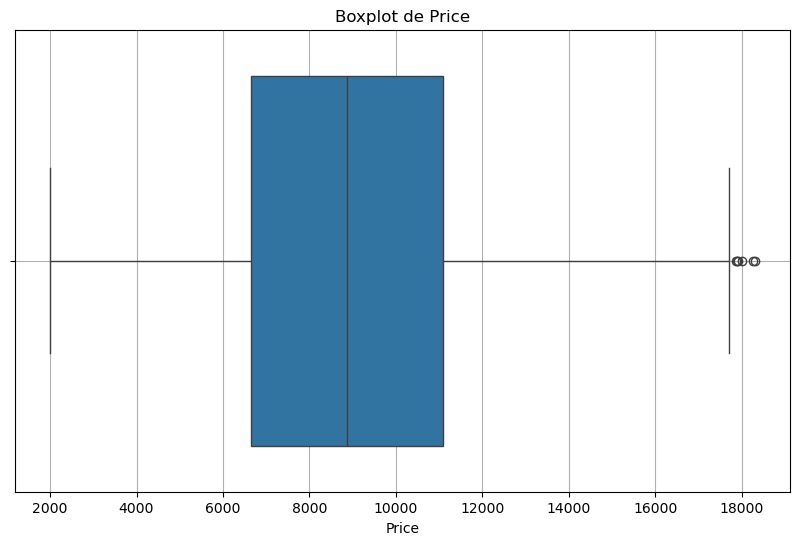

In [42]:
plot_boxplot(df, 'Price')

In [43]:
limiar_inferior = df['Price'].quantile(0.25) - 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
limiar_superior = df['Price'].quantile(0.75) + 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
print(f'Limiar inferior: {limiar_inferior}')
print(f'Limiar superior: {limiar_superior}')

Limiar inferior: -14.75
Limiar superior: 17747.25


> A maior parte dos dados se concentra entre valores de 6500 - 11700, sendo que valores maiores que 17000 já podem ser considerados como outliers de preço.

> O centro da distribuição se da ao entorno do valor de 8858

> A mediana próxima da média, junto ao baixo grau de assimetria indicam uma possível característica de normalidade.

> Todavia, a curtose negativa, mesmo que com baixo valor, indica uma distribuição platicúrtica, em que há menos valores concentrados nas extremidades (comparando com a distribuição normal) e um maior conjunto de valores no intervalo central.

## 3) Análise Bivariada

### Análise da dispersão

In [44]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price', 'Engine_Bin'],
      dtype='object')

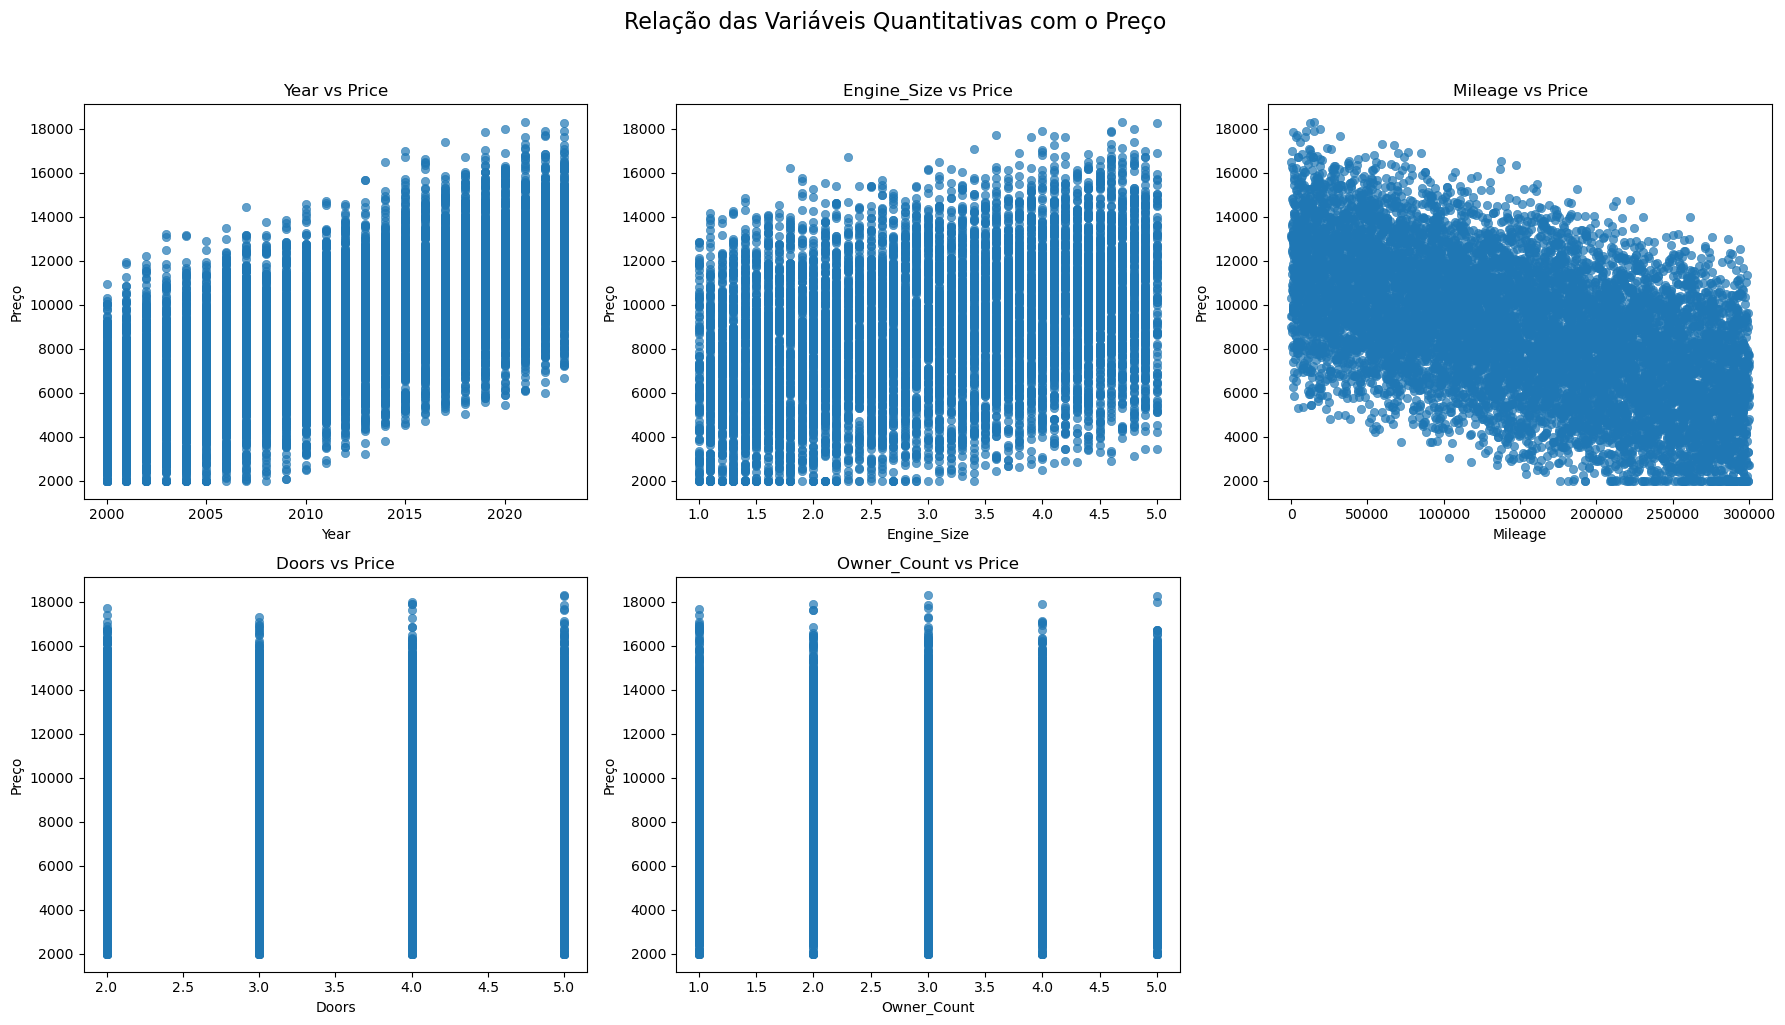

In [45]:
variaveis_explicativas = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
target = 'Price'

# Tamanho da grade para mostrar os plots (ajusta se tiver mais variáveis)
n_linhas = 2
n_colunas = 3
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(18, 10))
axes = axes.flatten()  # transforma os eixos em vetor pra iterar fácil

# Loop para gerar os gráficos
for i, var in enumerate(variaveis_explicativas):
    sns.scatterplot(data=df, x=var, y=target, ax=axes[i], alpha=0.7, edgecolor=None)
    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Preço')

# Se sobrar algum subplot vazio (caso número de variáveis < número de subplots), esconde
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Relação das Variáveis Quantitativas com o Preço', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Matriz de correlação para variáveis quantitativas

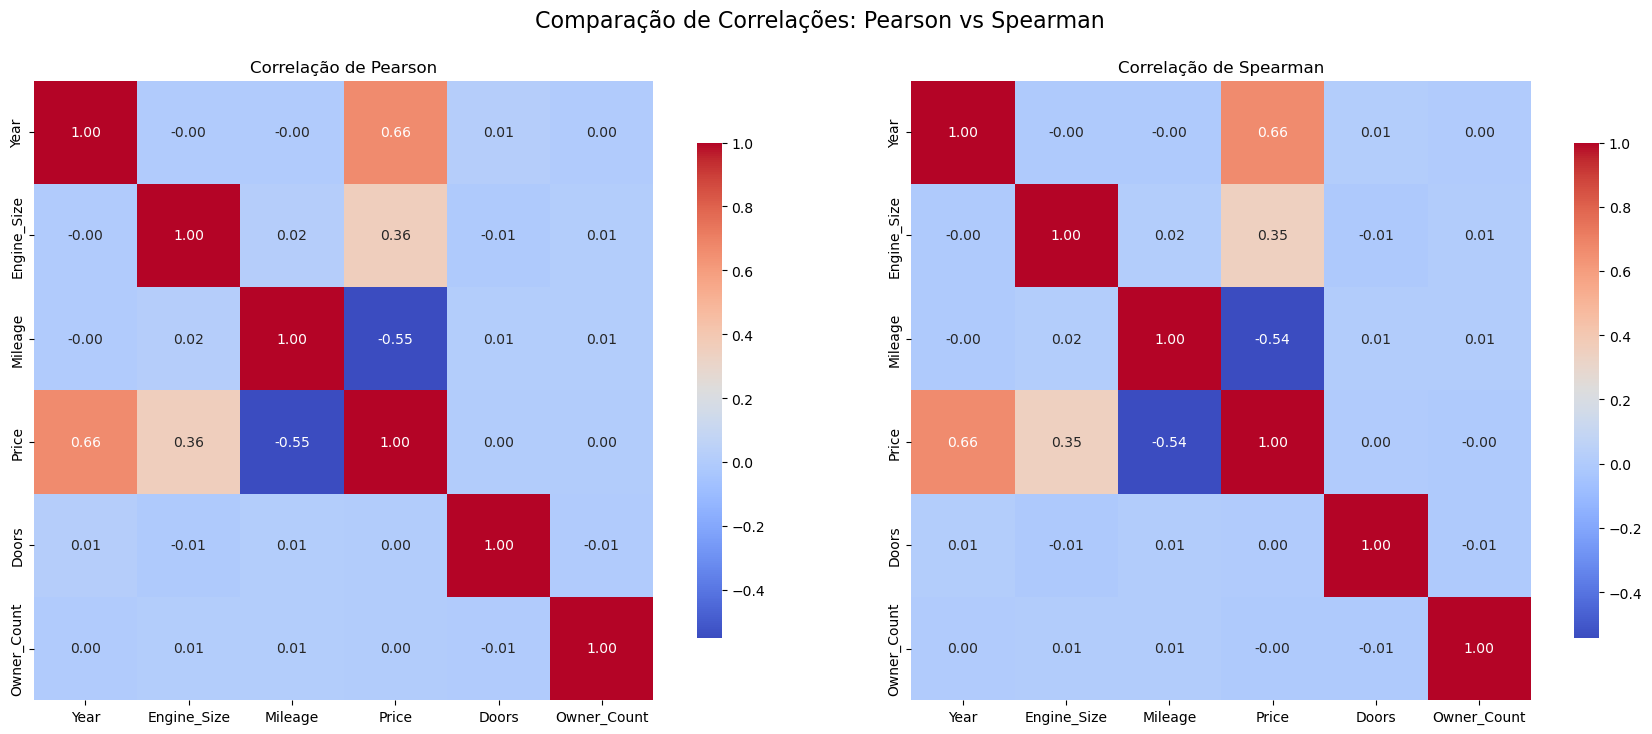

In [46]:
# Seleciona apenas as variáveis quantitativas
variaveis_quantitativas = ['Year', 'Engine_Size', 'Mileage', 'Price', 'Doors', 'Owner_Count']
df_variaveis_quantitativas = df[variaveis_quantitativas].copy()

# Calcula as duas matrizes de correlação
correlacao_pearson = df_variaveis_quantitativas.corr(method='pearson')
correlacao_spearman = df_variaveis_quantitativas.corr(method='spearman')

# Cria a figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Pearson
sns.heatmap(correlacao_pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=axs[0], cbar_kws={"shrink": .8})
axs[0].set_title('Correlação de Pearson')

# Spearman
sns.heatmap(correlacao_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=axs[1], cbar_kws={"shrink": .8})
axs[1].set_title('Correlação de Spearman')

plt.suptitle('Comparação de Correlações: Pearson vs Spearman', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [47]:
# Teste de validação de correlação
from scipy.stats import pearsonr, spearmanr
def validar_correlacao(df, var1, var2):
    pearson_corr, pearson_p = pearsonr(df[var1], df[var2])
    spearman_corr, spearman_p = spearmanr(df[var1], df[var2])
    
    print(f'Correlação de Pearson entre {var1} e {var2}: {pearson_corr:.2f}, p-valor: {pearson_p:.3f}')
    print(f'Correlação de Spearman entre {var1} e {var2}: {spearman_corr:.2f}, p-valor: {spearman_p:.3f}')

validar_correlacao(df, 'Year', 'Price')
validar_correlacao(df, 'Engine_Size', 'Price')
validar_correlacao(df, 'Mileage', 'Price')
validar_correlacao(df, 'Doors', 'Price')
validar_correlacao(df, 'Owner_Count', 'Price')

Correlação de Pearson entre Year e Price: 0.66, p-valor: 0.000
Correlação de Spearman entre Year e Price: 0.66, p-valor: 0.000
Correlação de Pearson entre Engine_Size e Price: 0.36, p-valor: 0.000
Correlação de Spearman entre Engine_Size e Price: 0.35, p-valor: 0.000
Correlação de Pearson entre Mileage e Price: -0.55, p-valor: 0.000
Correlação de Spearman entre Mileage e Price: -0.54, p-valor: 0.000
Correlação de Pearson entre Doors e Price: 0.00, p-valor: 0.959
Correlação de Spearman entre Doors e Price: 0.00, p-valor: 0.823
Correlação de Pearson entre Owner_Count e Price: 0.00, p-valor: 0.791
Correlação de Spearman entre Owner_Count e Price: -0.00, p-valor: 0.920


> As variáveis Ano (Year) e Quilometragem (Mileage) são os preditores mais fortes do preço, com o ano tendo uma relação positiva e a quilometragem uma relação negativa.

> Tamanho do Motor (Engine_Size) também mostra uma tendência positiva, mas com mais variabilidade.

> Year, Mileage e Engine_Size são estatisticamente significativas e têm efeitos visivelmente importantes, o que justifica fortemente a inclusão delas numa modelagem de regressão posterior.

> Portas (Doors) e Número de Proprietários (Owner_Count) não parecem ter uma relação clara ou forte com o preço neste conjunto de dados.

### Análise de Variáveis Categóricas

In [48]:
# Funções necessárias para o teste ANOVA
def teste_anova(df, variavel_categoria, variavel_numerica):
    """
    Executa ANOVA entre os grupos da variável categórica e retorna o p-valor e F-statistic.

    Parâmetros:
    - df: DataFrame
    - variavel_categoria: nome da coluna categórica (string)
    - variavel_numerica: nome da coluna numérica (string)

    Exemplo:
    teste_anova(df, 'Fuel_Type', 'Price')
    """
    # Agrupa os dados: cria uma lista de arrays de preços por categoria
    grupos = [grupo[variavel_numerica].values for nome, grupo in df.groupby(variavel_categoria)]
    
    # Garante que existem pelo menos dois grupos
    if len(grupos) < 2:
        print("Erro: ANOVA requer pelo menos 2 grupos.")
        return
    
    # Aplica ANOVA
    f_stat, p_valor = stats.f_oneway(*grupos)
    
    print(f"🔍 ANOVA para '{variavel_categoria}' vs '{variavel_numerica}':")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-valor: {p_valor:.10f}")
    
    if p_valor < 0.05:
        print("✅ Diferença significativa entre os grupos (p < 0.05)")
    else:
        print("❌ Nenhuma diferença significativa entre os grupos (p ≥ 0.05)")

# Função para plotar boxplot e realizar ANOVA
def plot_boxplot_anova(df, variavel_categoria, variavel_numerica):
    """
    Plota um boxplot da variável numérica por categoria e executa ANOVA.

    Parâmetros:
    - df: DataFrame
    - variavel_categoria: nome da coluna categórica (string)
    - variavel_numerica: nome da coluna numérica (string)
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=variavel_categoria, y=variavel_numerica, data=df)
    plt.title(f'Boxplot de {variavel_numerica} por {variavel_categoria}')
    plt.xlabel(variavel_categoria)
    plt.ylabel(variavel_numerica)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


def teste_post_hoc_alternativo(df, variavel_categoria, variavel_numerica, alpha=0.05):
    """
    Executa um teste Post-Hoc de Tukey HSD com uma interpretação alternativa
    que explicita as médias para maior clareza.

    Parâmetros:
    - df: DataFrame com os dados
    - variavel_categoria: nome da coluna categórica (string)
    - variavel_numerica: nome da coluna numérica (string)
    - alpha: nível de significância (padrão 0.05)

    Requer: statsmodels.stats.multicomp.pairwise_tukeyhsd
    """

    print(f"\n🔬 Realizando Teste Post-Hoc Alternativo (Tukey HSD) para '{variavel_categoria}' vs '{variavel_numerica}':")

    # 1. Calcular e mostrar as médias de cada grupo para referência
    medias_por_grupo = df.groupby(variavel_categoria)[variavel_numerica].mean().sort_values(ascending=False)
    print("\nMédias de Preço por Categoria (para Referência):")
    print(medias_por_grupo)

    # 2. Verificar se há dados suficientes para cada grupo
    contagens_por_grupo = df.groupby(variavel_categoria).size()
    min_obs_per_group = contagens_por_grupo.min()
    if min_obs_per_group < 2:
        print(f"Aviso: Pelo menos um grupo ('{variavel_categoria}') tem menos de 2 observações. Tukey HSD pode não ser adequado.")
        print("Contagens por grupo:")
        print(contagens_por_grupo)
        return

    try:
        # 3. Executa o teste Tukey HSD
        tukey_results = pairwise_tukeyhsd(endog=df[variavel_numerica],
                                          groups=df[variavel_categoria],
                                          alpha=alpha)

        # 4. Mostra o resumo da análise (a tabela formatada)
        print("\n" + tukey_results.summary().as_text()) # Usar .as_text() para ter controle sobre a impressão

        # 5. Interpretação dos resultados com base nas médias e no meandiff
        print("\n📊 Interpretação dos pares com diferença significativa:")
        
        # Obter os dados do sumário (pulando o cabeçalho)
        summary_data = tukey_results.summary().data[1:] 

        significativos = [linha for linha in summary_data if linha[-1] == True] # Filtrar onde 'reject' é True

        if significativos:
            print(f"Pares com diferença estatisticamente significativa (p < {alpha}):")
            for linha in significativos:
                group1_name, group2_name, meandiff_val, p_adj_val, _, _, _ = linha
                
                # Converter para float para operações e formatação
                meandiff_val = float(meandiff_val)
                p_adj_val = float(p_adj_val)

                # Acessar as médias calculadas para cada grupo
                mean_group1 = medias_por_grupo.loc[group1_name]
                mean_group2 = medias_por_grupo.loc[group2_name]
                
                # Determinar qual grupo é maior/menor com base nas médias reais
                if mean_group1 > mean_group2:
                    comparacao = f"'{group1_name}' é mais caro que '{group2_name}'"
                elif mean_group1 < mean_group2:
                    comparacao = f"'{group1_name}' é mais barato que '{group2_name}'"
                else: # Improvável com floats, mas para completude
                    comparacao = f"'{group1_name}' e '{group2_name}' têm o mesmo preço médio"

                print(f"- {group1_name} vs {group2_name}: Diferença média (Group1 - Group2) = {meandiff_val:.2f}, p-valor ajustado = {p_adj_val:.4f}. ({comparacao})")
        else:
            print(f"Nenhum par de grupos apresentou diferença estatisticamente significativa com p < {alpha}.")

    except Exception as e:
        print(f"\n❌ Erro ao executar o teste Tukey HSD: {e}")
        print("🔎 Verifique se os nomes das colunas estão corretos, se há variância nos grupos e se os dados são numéricos e categóricos adequadamente.")


#### `Brand`:

In [49]:
df.groupby('Brand')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Audi,1038.0,8929.373796,3127.683628,2000.0,6797.25,8917.0,11189.00,18255.0
BMW,999.0,8704.068068,3110.670391,2000.0,6562.00,8741.0,11064.00,17386.0
Chevrolet,1003.0,9015.683948,3124.432775,2000.0,6721.50,9038.0,11285.50,17661.0
Ford,1048.0,8852.570611,3097.290741,2000.0,6695.75,8775.5,10964.50,18017.0
Honda,1009.0,8665.596630,3083.062603,2000.0,6483.00,8624.0,10799.00,17906.0
Hyundai,995.0,8778.279397,3101.123378,2000.0,6571.50,8755.0,10997.50,17871.0
Kia,976.0,8880.086066,3058.533040,2000.0,6648.25,8914.0,11105.00,17630.0
Mercedes,942.0,8980.087049,3111.134790,2000.0,6745.25,9142.0,11121.75,17614.0
Toyota,970.0,8798.184536,3205.189393,2000.0,6445.25,8726.0,11200.75,18301.0


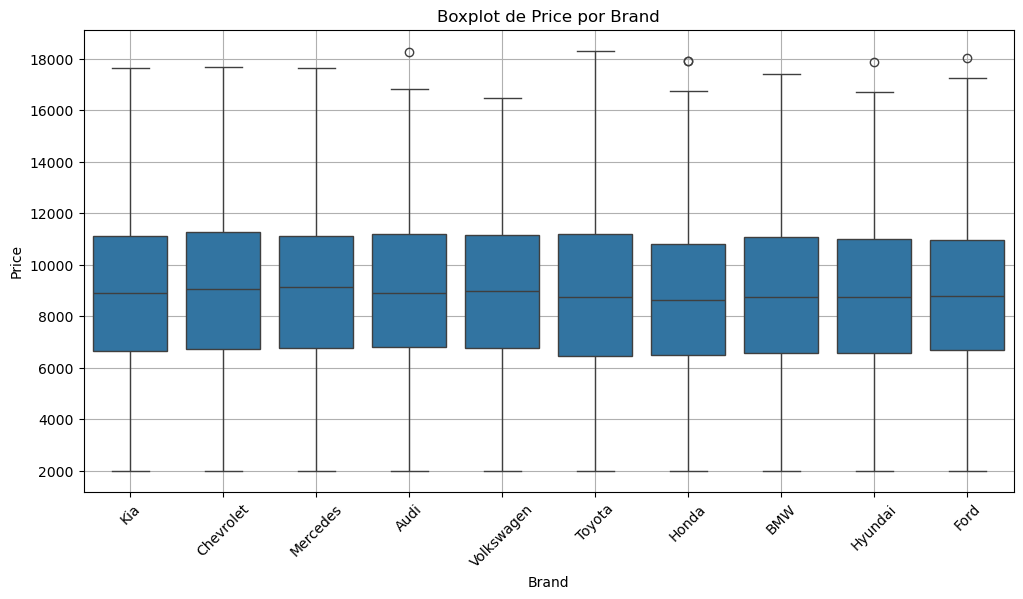

In [50]:
plot_boxplot_anova(df, 'Brand', 'Price')

In [51]:
# ANOVA
teste_anova(df, 'Brand', 'Price')

🔍 ANOVA para 'Brand' vs 'Price':
F-statistic: 1.3812
p-valor: 0.1902763700
❌ Nenhuma diferença significativa entre os grupos (p ≥ 0.05)


> Não podemos afirmar, com base nos dados e no teste ANOVA, que a marca do carro influencia significativamente o seu preço médio.

#### `Model`:

In [52]:
df.groupby('Model')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
3 Series,335.0,8854.752239,2985.885089,2000.0,6848.00,8738.0,11237.00,17134.0
5 Series,353.0,8669.218130,3183.787781,2000.0,6302.00,8790.0,10981.00,17386.0
A3,338.0,8912.316568,3159.567162,2000.0,6653.75,8880.0,11224.50,18255.0
A4,350.0,8919.962857,3134.161568,2374.0,6805.50,8889.0,11123.25,16619.0
Accord,365.0,8743.761644,2994.428464,2000.0,6620.00,8771.0,10706.00,17906.0
C-Class,306.0,8921.660131,3158.725731,2000.0,6825.00,9248.0,11018.50,17614.0
CR-V,308.0,8734.714286,2984.999402,2000.0,6727.50,8656.5,10820.50,17899.0
Camry,321.0,8712.420561,3160.780175,2000.0,6429.00,8693.0,11188.00,16712.0
Civic,336.0,8517.327381,3264.896135,2000.0,5925.75,8427.0,10872.00,16722.0


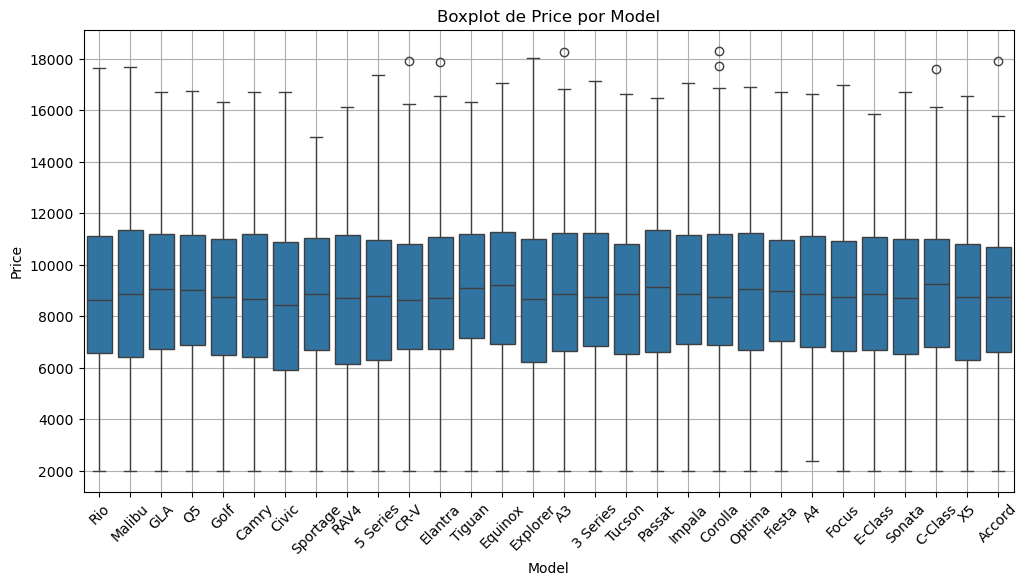

In [53]:
plot_boxplot_anova(df, 'Model', 'Price')

In [54]:
teste_anova(df, 'Model', 'Price')

🔍 ANOVA para 'Model' vs 'Price':
F-statistic: 0.7604
p-valor: 0.8177865225
❌ Nenhuma diferença significativa entre os grupos (p ≥ 0.05)


> Assim como a marca do veículo, também é passível de afirmar que, para o modelo do mesmo, não há uma associação significativa, como verificável junto aos dados e ao teste anova, ente Model e Price

#### `Fuel_Type`

In [55]:
df.groupby('Fuel_Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Fuel_Type,,,,,,,,
Diesel,2512.0,8117.336385,2979.033575,2000.0,5940.0,8107.0,10222.25,16854.0
Electric,2625.0,10032.220190,2988.575806,2000.0,7881.0,10051.0,12177.00,18301.0
Hybrid,2453.0,9113.030167,3055.538900,2000.0,6955.0,9110.0,11343.00,18255.0
Petrol,2410.0,8070.561826,2994.982789,2000.0,5910.5,8167.5,10148.75,16717.0


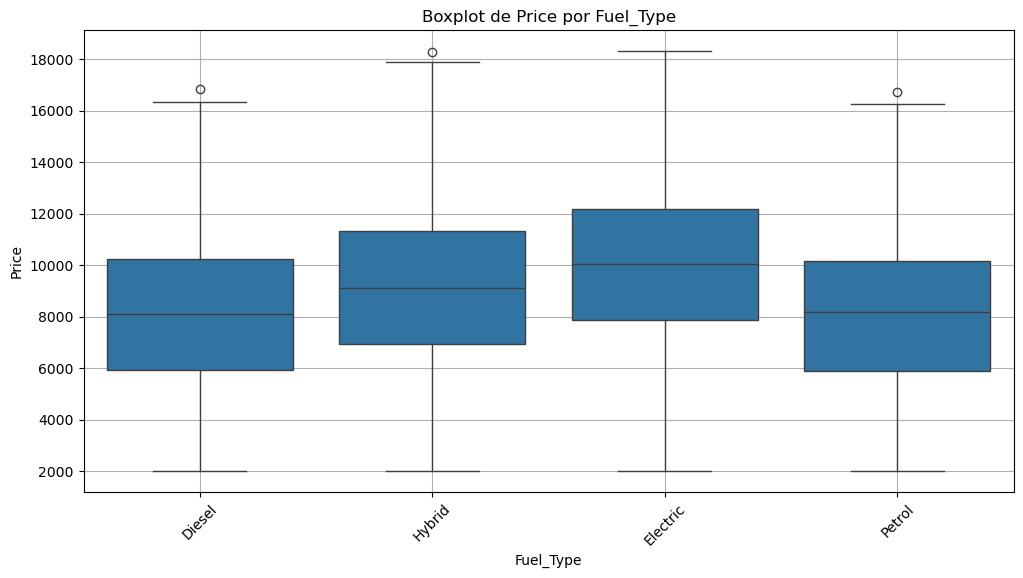

In [56]:
plot_boxplot_anova(df, 'Fuel_Type', 'Price')

In [57]:
teste_anova(df, 'Fuel_Type', 'Price')

🔍 ANOVA para 'Fuel_Type' vs 'Price':
F-statistic: 245.6293
p-valor: 0.0000000000
✅ Diferença significativa entre os grupos (p < 0.05)


In [58]:
teste_post_hoc_alternativo(df, 'Fuel_Type', 'Price')


🔬 Realizando Teste Post-Hoc Alternativo (Tukey HSD) para 'Fuel_Type' vs 'Price':

Médias de Preço por Categoria (para Referência):
Fuel_Type
Electric    10032.220190
Hybrid       9113.030167
Diesel       8117.336385
Petrol       8070.561826
Name: Price, dtype: float64

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  Diesel Electric  1914.8838    0.0  1699.4243  2130.3433   True
  Diesel   Hybrid   995.6938    0.0   776.5716   1214.816   True
  Diesel   Petrol   -46.7746 0.9476  -266.8836   173.3345  False
Electric   Hybrid    -919.19    0.0 -1135.9696  -702.4105   True
Electric   Petrol -1961.6584    0.0 -2179.4353 -1743.8814   True
  Hybrid   Petrol -1042.4683    0.0 -1263.8697   -821.067   True
----------------------------------------------------------------

📊 Interpretação dos pares com diferença significativa:
Pares com diferença est

> Como demonstrado pela visualização dos dados e pelo teste ANOVA, há uma variação significativamente estatística entre as médias de preços de carros por tipo de combustível

> O teste post-hoc de Tukey HSD, confirmou a observação demonstrada pelo boxplot, de que carros elétricos e híbridos tendem a ser mais caros que os demais, sendo que o primeiro tem um maior preço.

> Pela relevância da associação, Fuel_Type deve ser inserido no modelo de regressão

#### `Transmission`:

In [59]:
df.groupby('Transmission')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Automatic,3317.0,9938.252939,3025.692193,2000.0,7784.0,10034.0,12070.0,18301.0
Manual,3372.0,8363.426157,3019.758983,2000.0,6159.5,8341.5,10514.5,16844.0
Semi-Automatic,3311.0,8264.266385,3006.190812,2000.0,6069.0,8263.0,10364.5,17078.0


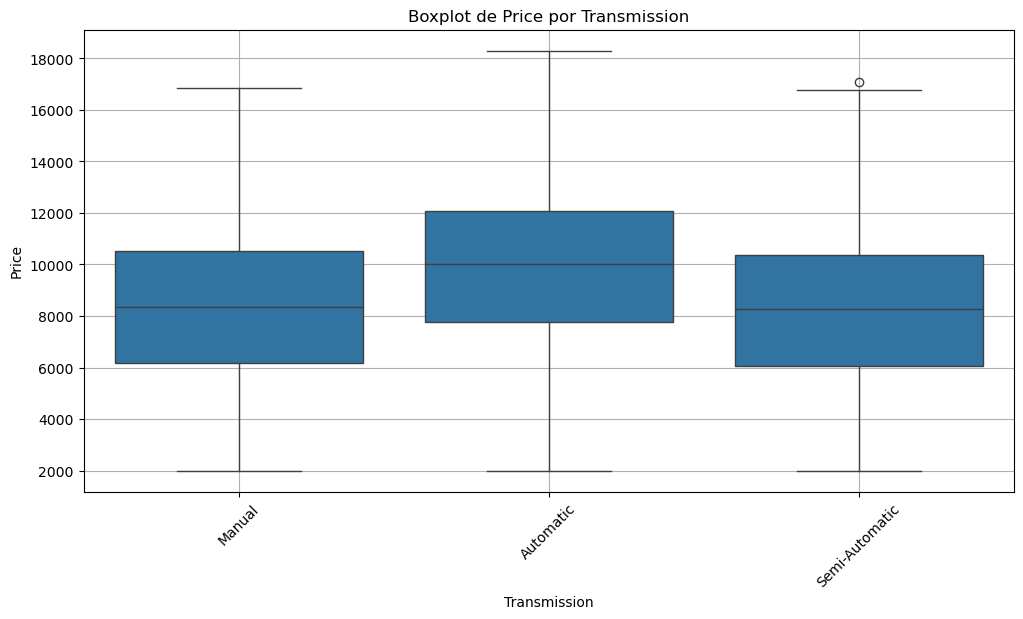

In [60]:
plot_boxplot_anova(df, 'Transmission', 'Price')

In [61]:
teste_anova(df, 'Transmission', 'Price')

🔍 ANOVA para 'Transmission' vs 'Price':
F-statistic: 321.9821
p-valor: 0.0000000000
✅ Diferença significativa entre os grupos (p < 0.05)


In [62]:
teste_post_hoc_alternativo(df, 'Transmission', 'Price')


🔬 Realizando Teste Post-Hoc Alternativo (Tukey HSD) para 'Transmission' vs 'Price':

Médias de Preço por Categoria (para Referência):
Transmission
Automatic         9938.252939
Manual            8363.426157
Semi-Automatic    8264.266385
Name: Price, dtype: float64

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1      group2      meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------
Automatic         Manual -1574.8268    0.0 -1747.7852 -1401.8684   True
Automatic Semi-Automatic -1673.9866    0.0 -1847.7332 -1500.2399   True
   Manual Semi-Automatic   -99.1598 0.3712  -272.1972    73.8776  False
-----------------------------------------------------------------------

📊 Interpretação dos pares com diferença significativa:
Pares com diferença estatisticamente significativa (p < 0.05):
- Automatic vs Manual: Diferença média (Group1 - Group2) = -1574.83, p-valor ajustado = 0.0000. ('Automatic' é

> De acordo com a observação do boxplot, junto a confirmação com o teste ANOVA, o tipo de transmissão do veículo também é um fator de associação significativa com o preço do veículo

> O teste post-hoc de Tukey HSD demonstra que a categoria do Automático tem uma diferença de preço significativa em relação aos demais

> Para a regressão, Transmission deve ser incluído na modelagem.

## 4) Análise Multivariada

In [65]:
# Separando variáveis quantitativas e categóricas selecionadas para o modelo
variaveis_quantitativas_modelo = ['Year', 'Engine_Size', 'Mileage']
variaveis_categoricas_modelo = ['Fuel_Type', 'Transmission']
df_variaveis_correlacionadas = df[variaveis_quantitativas_modelo + variaveis_categoricas_modelo + ['Price']].copy()

df_variaveis_correlacionadas.head()

,Year,Engine_Size,Mileage,Fuel_Type,Transmission,Price
0,2020,4.2,289944,Diesel,Manual,8501
1,2012,2.0,5356,Hybrid,Automatic,12092
2,2020,4.2,231440,Diesel,Automatic,11171
3,2023,2.0,160971,Electric,Manual,11780
4,2003,2.6,286618,Hybrid,Semi-Automatic,2867


### Análise de Multicolinearidade:

#### Variáveis Quantitativas:

In [75]:
print(df_variaveis_correlacionadas.corr(numeric_only=True))

                 Year  Engine_Size   Mileage     Price
Year         1.000000    -0.001306 -0.002476  0.663036
Engine_Size -0.001306     1.000000  0.015135  0.357403
Mileage     -0.002476     0.015135  1.000000 -0.551227
Price        0.663036     0.357403 -0.551227  1.000000


Text(0.5, 1.0, 'Matriz de Correlação das Variáveis Selecionadas')

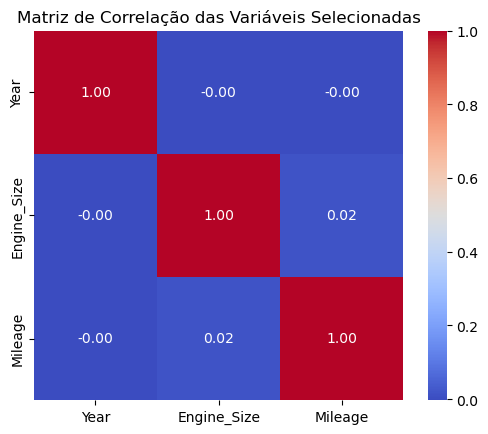

In [73]:
correlacionadas_sem_preco = df_variaveis_correlacionadas.drop(columns=['Price']).copy()
sns.heatmap(correlacionadas_sem_preco.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Selecionadas')

In [96]:
# Aplicando VIF para verificar multicolinearidade
df_quant = df[variaveis_quantitativas_modelo].copy()

# Adicionar constante para cálculo do VIF
X_const = add_constant(df_quant)

# Calcular VIF para cada variável quantitativa
vif_data = pd.DataFrame({
    'Variável': X_const.columns,
    'VIF': [vif(X_const.values, i) for i in range(X_const.shape[1])]
})

# Remover a constante e ordenar para visualização
vif_data = vif_data[vif_data['Variável'] != 'const'].sort_values(by='VIF', ascending=False)

# Mostrar os valores de VIF
print("VIF - Verificação de multicolinearidade (Variáveis Quantitativas):")
print(vif_data.to_string(index=False))

# Interpretação simples do maior VIF
max_vif = vif_data['VIF'].max()
variavel_critica = vif_data.iloc[0]['Variável']

print("\nInterpretação:")
if max_vif < 5:
    print("Sem indícios de multicolinearidade (VIF < 5).")
elif max_vif < 10:
    print("Alguma multicolinearidade moderada (VIF entre 5 e 10). Verifique a variável:", variavel_critica)
else:
    print(f"Multicolinearidade alta (VIF > 10). Considere remover ou tratar a variável: {variavel_critica}")

VIF - Verificação de multicolinearidade (Variáveis Quantitativas):
   Variável      VIF
    Mileage 1.000235
Engine_Size 1.000231
       Year 1.000008

Interpretação:
Sem indícios de multicolinearidade (VIF < 5).


> Como demonstrado pelo Fator de Inflação de Variância e também pela Matriz de Correlação entre as variáveis numéricas selecionadas para o modelo, *não há* indícios de multicolinearidade entre as mesmas, assim sendo, são de relevante consideração para explicar e elaborar o modelo futuro de regressão.

#### Variáveis Qualitativas:

In [87]:
df_variaveis_correlacionadas.groupby('Fuel_Type')['Transmission'].describe()

,count,unique,top,freq
Fuel_Type,,,,
Diesel,2512,3,Manual,846
Electric,2625,3,Manual,893
Hybrid,2453,3,Automatic,819
Petrol,2410,3,Manual,816


In [91]:
# Tabela de contingência
tabela_contingencia = pd.crosstab(df_variaveis_correlacionadas['Fuel_Type'], df_variaveis_correlacionadas['Transmission'])
print("\n📊 Tabela de Contingência entre 'Fuel_Type' e 'Transmission'")
tabela_contingencia


📊 Tabela de Contingência entre 'Fuel_Type' e 'Transmission'


Transmission,Automatic,Manual,Semi-Automatic
Fuel_Type,,,
Diesel,827,846,839
Electric,881,893,851
Hybrid,819,817,817
Petrol,790,816,804


In [94]:
# --- Definir variáveis ---
cat1 = 'Fuel_Type'
cat2 = 'Transmission'

# --- Teste de associação entre variáveis categóricas ---
print(f"\nTeste Qui-Quadrado entre '{cat1}' e '{cat2}'")
chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)
print(f"P-valor: {p:.4f}")

# Interpretação do p-valor
if p < 0.05:
    print(f"Há associação significativa entre '{cat1}' e '{cat2}' (p < 0.05). Pode haver redundância.")
else:
    print(f"Nenhuma associação significativa entre '{cat1}' e '{cat2}' (p ≥ 0.05). Podem ser mantidas.")




Teste Qui-Quadrado entre 'Fuel_Type' e 'Transmission'
P-valor: 0.9841
Nenhuma associação significativa entre 'Fuel_Type' e 'Transmission' (p ≥ 0.05). Podem ser mantidas.


> Com base na observação da tabela de contingência e teste qui² para as variáveis categóricas de Fuel_Type e Transmission, não há indícios de associação entre ambas, descartando uma possível multicolinearidade entre as mesmas.

> Ao concluir a análise exploratória de dados (EDA), verificamos que não há indícios de multicolinearidade significativa dentro dos grupos de variáveis — tanto entre as variáveis numéricas quanto entre as categóricas. Dessa forma, selecionamos para o modelo as variáveis:: `Year`, `Milleage`, `Engine_Size`, `Fuel_Type` e `Transmission`

## 5) Salvando dados filtrados para fase de transformação pré-modelagem:

In [99]:
dados_para_transformacao = df_variaveis_correlacionadas.copy()

diretorio = '../dados/processed'
nome_arquivo = 'car_price_dataset_for_regression_.csv'
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Criar diretório se não existir
os.makedirs(diretorio, exist_ok=True)

# Verificar se já existe
if os.path.isfile(caminho_completo):
    print(f"Arquivo {nome_arquivo} já existia, será sobrescrito.")
else:
    print(f"Criando novo arquivo: {nome_arquivo}")

# Salvar
dados_para_transformacao.to_csv(caminho_completo, index=False)
print(f"Arquivo salvo em: {caminho_completo}")

Arquivo car_price_dataset_for_regression_.csv já existia, será sobrescrito.
Arquivo salvo em: ../dados/processed\car_price_dataset_for_regression_.csv
